## Исследование данных о российском кинопрокате
### Введение.
В данном проекте исследуются данные о россиском кинопрокате. В рамках проекта мы рассмотрим основные параметры кинолент, влияющие на их коммерческий успех, такие как возрастные категории фильмов, жанры, длительность фильмов. Также, отдельно будет рассмотрена категория фильмов, снятых с государственной поддержкой - насколько они успешны и востребованны рынком.


### Изучение файлов и объединение датафреймов. 


__!!!   NB   !!!__

В проекте используются датасеты из открытых источников, они подгружаются с гугл таблиц

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from io import BytesIO
import requests
#Изменение ограничений на длину вывода информации
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:,.1f}'.format
import warnings
warnings.filterwarnings('ignore') #Много предупреждений о копировании датасетов через .loc, отключил

In [2]:
try:
    films = pd.read_csv('mkrf_movies.csv')#, sep=None, engine='python', encoding='utf-8')
    box_office = pd.read_csv('mkrf_shows.csv')#, sep=None, engine='python', encoding='utf-8')
except:
    films = pd.read_csv('/datasets/mkrf_movies.csv', sep=None, engine='python', encoding='utf-8')
    box_office = pd.read_csv('/datasets/mkrf_shows.csv', sep=None, engine='python', encoding='utf-8')
    #Проверим правильно ли считались данные
display('Данные о ',films.head())
display(box_office.head())

'Данные о '

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


На первый взгляд данные считались без ошибок.

In [3]:
print(films.info())
print(box_office.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_

Сравним предоставленные данные по прокату с данными с сайта министерства культуры.

In [4]:
prokat_2019 = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1je170KN9vY-7dadlBGeu_weVOZg_3rgvWL9mjcddZ-E/export?format=csv').content))

In [5]:
prokat_2018 = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/12dzg4ZzFcEA1ApDxkF3MzIN5lP2t9pq_JKVfc-gVbeA/export?format=csv').content))

In [6]:
prokat_2017 = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1WQyuadeFgrhcvxlKTVJF60ZDrkGLAIkuQwFywXBOeCI/export?format=csv').content))

In [7]:
prokat_2016 = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1wxTq627W9CfALT0WIV07swH0E9n0sq4ltDWMZspSauE/export?format=csv').content))

In [8]:
prokat_2015 = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1PBbIoq_LzoAsOUcatK2-AJV-mjYMGodILXyjMTI41EU/export?format=csv').content))

In [9]:
box_office_total = pd.concat([prokat_2015, 
                              prokat_2016,
                              prokat_2017,
                              prokat_2018,
                              prokat_2019], axis=0, sort=True, ignore_index=True)

#Проверим, почему в данных задвоенность, и что с ней делать
print('Дублированные номера прокатных удостоверений:')
display(box_office_total[box_office_total['№ ПУ'].duplicated(keep=False)].sort_values('№ ПУ').head(10))
#объединим данные по сборам
box_office_total = box_office_total.groupby('№ ПУ').sum().reset_index()#
print('\n Датафрейм минкульта 2015-2019 года \n')
box_office_total['№ ПУ'] = pd.to_numeric(box_office_total['№ ПУ'], errors='coerce')
box_office['puNumber'] = pd.to_numeric(box_office['puNumber'], errors='coerce')
box_office_total.info()
print('\n Датафрейм ЯП \n')
box_office.info()
#Объединим эти два датафрейма
box_office_total = pd.merge(left=box_office_total, 
         right=box_office, 
         left_on='№ ПУ', 
         right_on='puNumber',
         how='left'
           ).drop(axis='columns', labels='puNumber')
print('\n Объединенный датафрейм \n')
box_office_total.loc[box_office_total['Сборы, руб.']==box_office_total['box_office'], ['box_office']] = None
box_office_total = box_office_total.query('box_office.isna()').drop(axis=1, labels= 'box_office')
box_office_total = box_office_total.groupby('№ ПУ').sum().reset_index()#
box_office_total['№ ПУ'].duplicated(keep=False).sum()
box_office_total.info()

Дублированные номера прокатных удостоверений:


,Возрастное ограничение,Дата релиза,Название,"Сборы, руб.",Тип,№ ПУ
567,«16+» для детей старше 16 лет,Mon May 11 2015 00:00:00 GMT+0300 (MSK),Экспириенс,"33,900.0",художественный,111000315
3859,«16+» для детей старше 16 лет,Mon May 11 2015 00:00:00 GMT+0300 (MSK),Экспириенс,"2,650.0",Кино,111000315
556,«18+» запрещено для детей,NaN,Что творят мужчины!,"778,307.6",художественный,111000513
3484,«18+» запрещено для детей,NaN,Что творят мужчины,720.0,Кино,111000513
505,«12+» для детей старше 12 лет,NaN,Территория,"72,486,787.4",художественный,111000515
4029,«12+» для детей старше 12 лет,NaN,Территория,"91,530.0",Кино,111000515
4036,«12+» для детей старше 12 лет,NaN,Батальонъ,"3,540.0",Кино,111000715
39,«12+» для детей старше 12 лет,NaN,Батальонъ,"451,808,681.7",художественный,111000715
148,«12+» для детей старше 12 лет,Sun Jul 05 2015 00:00:00 GMT+0300 (MSK),Дорога на Берлин,"22,690,690.0",художественный,111001315
4040,«12+» для детей старше 12 лет,Sun Jul 05 2015 00:00:00 GMT+0300 (MSK),Дорога на Берлин,"32,885.0",Кино,111001315



 Датафрейм минкульта 2015-2019 года 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 2 columns):
№ ПУ           6134 non-null float64
Сборы, руб.    6146 non-null float64
dtypes: float64(2)
memory usage: 96.2 KB

 Датафрейм ЯП 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB

 Объединенный датафрейм 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 2 columns):
№ ПУ           6129 non-null float64
Сборы, руб.    6129 non-null float64
dtypes: float64(2)
memory usage: 95.9 KB


Выведем процент None-значений для столбцов

In [10]:
films['puNumber'] = pd.to_numeric(films['puNumber'], errors='coerce')
for column in films:
    print('{0:30} {1:.2%}'.format(column, films[column].isna().mean()))

title                          0.00%
puNumber                       0.01%
show_start_date                0.00%
type                           0.00%
film_studio                    0.24%
production_country             0.03%
director                       0.12%
producer                       7.59%
age_restriction                0.00%
refundable_support             95.57%
nonrefundable_support          95.57%
budget                         95.57%
financing_source               95.57%
ratings                        12.92%
genres                         13.04%


Дополнительная информация из открытых источников позволила расширить изначальные данные. Если большинство столбцов не влияют на выполнение поставленной в проекте задачи, то "Название фильма на иностранном языке" и "Возрастная категория.1" могут быть использованы в работе для удаления дубликатов. Также, в нем 94420 строк против 7486 в приложенном к проекту.

In [11]:
#films_mk = pd.read_csv('procat_2021.csv', low_memory=False)
#https://docs.google.com/spreadsheets/d/1QP-GQJ_5_WTn8rdhab4aEY7E_TlbFf2CQis1C31WokU/edit?usp=sharing
films_mk = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1QP-GQJ_5_WTn8rdhab4aEY7E_TlbFf2CQis1C31WokU/export?format=csv').content))
films_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94420 entries, 0 to 94419
Data columns (total 48 columns):
Название фильма                                          94420 non-null object
Hаименование на иностранном языке                        48715 non-null object
Номер удостоверения                                      94420 non-null object
Дата регистрации удостоверения                           94418 non-null object
Дата начала показа фильма                                94093 non-null object
Примечание                                               29182 non-null object
Идентификатор записи реестра                             94420 non-null int64
Аннотация                                                88553 non-null object
Вид Фильма                                               94415 non-null object
Категория                                                94420 non-null object
Язык оригинала                                           4 non-null float64
Формат кадра              

Считаем датасет заново, указав только нужные нам столбцы, и указав типы данных:

In [12]:
#Чтобы руками не переписывать, возьмем отсюда список названий столбцов
#films_mk.columns.tolist() 

In [13]:
films_mk.head()

,Название фильма,Hаименование на иностранном языке,Номер удостоверения,Дата регистрации удостоверения,Дата начала показа фильма,Примечание,Идентификатор записи реестра,Аннотация,Вид Фильма,Категория,Язык оригинала,Формат кадра,Количество серий,Метраж (для фильмов на кинопленке),Количество частей/рулонов (для фильмов на кинопленке),Цвет,"Продолжительность демонстрации, часы","Продолжительность демонстрации, минуты",Формат носителя,Объем носителя,Единица измерения,Студия-производитель,Страна производства,Год производства,Режиссер,Художник,Сценарист,Оператор,Композитор,Продюсер,Права на использование фильма,Категория прав на использование фильма,Срок действия прав на использование фильма,Срок действия прав на способ использования фильма,Возрастная категория,Возрастная категория.1,Дубляж (где дублирован),Срок действия прав проката до,Код,Права проката переданы,Порядковый номер переоформления/продления,Должность подписанта,ФИО подписанта,Запись удалена,Дата удаления записи,Не показывать на сайте mkrf.ru,дата создания объекта,дата обновления объекта
0,Почти знаменит,Almost Famous,221006316,2016-02-09T12:00:00.000Z,2016-02-09T12:00:00.000Z,NaN,2157027,"В ролях: Фрэнсис МакДорманд, Кейт Хадсон. Исто...",Художественный,Видео,nan,NaN,nan,NaN,NaN,Цветной,2.0,3.0,NaN,NaN,NaN,Коламбиа Пикчерз,США,2000,Кемерон Кроу,NaN,Кемерон Кроу,NaN,Джон Бонхэм,NaN,"ЗАО ""ФЕЛИСТА""",Телевидение (неисключительные права),NaN,01.01.2020,«18+» запрещено для детей,18.0,NaN,NaN,[],NaN,NaN,NaN,NaN,nan,NaN,nan,2017-07-05T14:10:11+03:00,2018-04-09T09:12:02+03:00
1,Открытое окно.,Open Window,221027814,2014-06-30T12:00:00.000Z,2014-06-30T12:00:00.000Z,NaN,2157028,"В главных ролях: Робин Тюннин, Джоэль Эдгертон...",Художественный,Видео,nan,NaN,nan,NaN,NaN,Цветной,1.0,37.0,NaN,NaN,NaN,"Кард Интертейнмент, Имэйдж Интертейнмент",США,2006,Миа Голдмен,NaN,Миа Голдмен,NaN,Клифф Эйдельман,NaN,"ООО ""Люксор Дистрибьюшн""","Коммерческое видео, Домашнее видео, Телевидение",NaN,01.12.2018,«16+» для детей старше 16 лет,16.0,NaN,NaN,[],NaN,NaN,NaN,NaN,nan,NaN,nan,2017-07-05T14:10:11+03:00,2018-04-09T09:12:02+03:00
2,Открытый простор,Open Range,221048915,2015-11-27T12:00:00.000Z,2015-11-27T12:00:00.000Z,NaN,2157029,"Драма-вестерн. В ролях: Роберт Дюволл, Кевин К...",Художественный,Кино,nan,ш/э,1.0,2923,7 рулонов,Цветной,2.0,23.0,NaN,NaN,NaN,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,2003,Кевин Костнер,Гэй С.Бакли,"Лоран Пэйн, Крейг Сторпер",Джеймс М.Муро,Майкл Кэмен,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс","ООО ""Дистрибуционная кинокомпания ""Парадиз""",Телевидение,NaN,31.08.2017,«18+» запрещено для детей,18.0,NaN,NaN,[],NaN,NaN,NaN,NaN,nan,NaN,nan,2017-07-05T14:10:11+03:00,2018-04-09T09:12:02+03:00
3,Особо важное задание,NaN,111013716,2016-09-13T12:00:00.000Z,2016-09-13T12:00:00.000Z,Показ фильма в кинозале и прокат фильма на мат...,2157030,"В ролях - В.Заклунная, Н.Крючков, Е.Матвеев ...",Художественный,Кино,nan,ш/э,2.0,3782,14,Цветной,2.0,4.0,NaN,NaN,NaN,"Киностудия ""Мосфильм""",СССР,1980,Е.Матвеев,С.Валюшок,"Б.Добродеев, П.Попогребский",И.Черных,Е.Птичкин,NaN,"ФГУП ""Киноконцерн ""Мосфильм""",Показ фильма в кинозале и прокат фильма на мат...,NaN,на срок действия авторского права на фильм,«6+» для детей старше шести лет,6.0,NaN,NaN,[],NaN,NaN,NaN,NaN,nan,NaN,nan,2017-07-05T14:10:11+03:00,2018-04-09T09:12:02+03:00
4,Особо опасен,Wanted,221038416,2016-10-10T12:00:00.000Z,2016-10-10T12:00:00.000Z,NaN,2157031,"В ролях: Джеймс МакЭвой, Анджелина Джоли. Тайн...",Художественный,Кино,nan,ш/э,1.0,3014,6 рулонов,Цветной,1.0,50.0,NaN,NaN,NaN,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,2008,Тимур Бекмамбетов,Джон Майр,"Майкл Брандт, Крис Морган, Дерек Хаас",Митчелл Амундсен,Дэнни Эльфман,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","ООО ""НД Плэй""",прокат фильма на материальном носителе,NaN,31.12.2020,«18+» запрещено для детей,18.0,NaN,NaN,[],NaN,NaN,NaN,NaN,nan,NaN,nan,2017-07-05T14:10:11+03:00,2021-04-06T12:16:16+03:00


In [14]:
films_mk = pd.read_csv(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1QP-GQJ_5_WTn8rdhab4aEY7E_TlbFf2CQis1C31WokU/export?format=csv').content),
                       low_memory=False,
                      usecols = ['Название фильма',
 'Hаименование на иностранном языке',
 'Номер удостоверения',
 'Дата регистрации удостоверения',
 'Дата начала показа фильма',
 'Идентификатор записи реестра',
 'Вид Фильма',
 'Категория',
 'Количество серий',
 'Продолжительность демонстрации, часы',
 'Продолжительность демонстрации, минуты',
 'Студия-производитель',
 'Страна производства',
 'Год производства',
 'Категория прав на использование фильма',                               
 'Режиссер', 
 'Сценарист',
 'Продюсер',
 'Возрастная категория.1'])
films_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94420 entries, 0 to 94419
Data columns (total 19 columns):
Название фильма                           94420 non-null object
Hаименование на иностранном языке         48715 non-null object
Номер удостоверения                       94420 non-null object
Дата регистрации удостоверения            94418 non-null object
Дата начала показа фильма                 94093 non-null object
Идентификатор записи реестра              94420 non-null int64
Вид Фильма                                94415 non-null object
Категория                                 94420 non-null object
Количество серий                          36641 non-null float64
Продолжительность демонстрации, часы      77828 non-null float64
Продолжительность демонстрации, минуты    91901 non-null float64
Студия-производитель                      94297 non-null object
Страна производства                       94353 non-null object
Год производства                          94209 non-null 

Переименуем столбцы

In [15]:
films_mk.rename(columns={'Название фильма':'name',
 'Hаименование на иностранном языке':'name_foreign',
 'Номер удостоверения':'pu_number',
 'Дата регистрации удостоверения':'date_pu_reg',
 'Дата начала показа фильма':'date_show_film',
 'Идентификатор записи реестра':'id_reestr',
 'Вид Фильма':'type_film',
 'Категория':'category_film',
 'Количество серий':'episodes',
 'Продолжительность демонстрации, часы':'duration',
 'Продолжительность демонстрации, минуты':'duration_m',
 'Студия-производитель':'studio',
 'Страна производства':'country',
 'Категория прав на использование фильма':'category_use',                     
 'Год производства':'year_production',
 'Режиссер':'director', 
 'Сценарист':'screenwriter',
 'Продюсер':'producer',
 'Возрастная категория.1':'age_restriction'}, inplace=True)
#films_mk.info() #проверим

In [16]:
#Преобразуем типы
films_mk['pu_number'] = pd.to_numeric(films_mk['pu_number'], errors='coerce')
films_mk['age_restriction'] = pd.to_numeric(films_mk['age_restriction'], errors='coerce')

#films_mk.info() #проверим

In [17]:
#Соединяем "родной" датасет и скачанный с минкульта
films_total = pd.merge(left=films_mk, 
         right=films[{'puNumber','refundable_support', 'nonrefundable_support','budget','financing_source', 'genres'}], 
         left_on='pu_number', 
         right_on='puNumber',
         how='left'
           ).drop(axis='columns', labels='puNumber')
#Добавляем датасет со сборами
films_total = films_total.merge(
        right=box_office_total, 
         left_on='pu_number', 
         right_on='№ ПУ',
         how='left'
           ).drop(axis='columns', labels='№ ПУ')
films_total.rename(columns={'Сборы, руб.':'box_office'}, inplace=True)
films_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94424 entries, 0 to 94423
Data columns (total 25 columns):
name                     94424 non-null object
name_foreign             48719 non-null object
pu_number                92610 non-null float64
date_pu_reg              94422 non-null object
date_show_film           94097 non-null object
id_reestr                94424 non-null int64
type_film                94419 non-null object
category_film            94424 non-null object
episodes                 36645 non-null float64
duration                 77832 non-null float64
duration_m               91905 non-null float64
studio                   94301 non-null object
country                  94357 non-null object
year_production          94213 non-null object
director                 91810 non-null object
screenwriter             82400 non-null object
producer                 57508 non-null object
category_use             87700 non-null object
age_restriction          94415 non-null fl

Проверим полноту данных для фильмов с положительными данными о сборах

In [18]:
films_total.query('box_office>0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5739 entries, 9 to 89936
Data columns (total 25 columns):
name                     5739 non-null object
name_foreign             3111 non-null object
pu_number                5739 non-null float64
date_pu_reg              5739 non-null object
date_show_film           5735 non-null object
id_reestr                5739 non-null int64
type_film                5739 non-null object
category_film            5739 non-null object
episodes                 2155 non-null float64
duration                 5373 non-null float64
duration_m               5675 non-null float64
studio                   5732 non-null object
country                  5738 non-null object
year_production          5734 non-null object
director                 5735 non-null object
screenwriter             5606 non-null object
producer                 4492 non-null object
category_use             5287 non-null object
age_restriction          5739 non-null float64
nonrefundable_

В целях расширения набора данных о софинансировании фильмов, добавим данные о государственной поддержке кинематографа(Источник - ЕАИС)

In [19]:
gos_support = pd.read_excel(BytesIO(requests.get('https://docs.google.com/spreadsheets/d/1CQG5G0FN1heCNeSRKOp4QXEaaERh3qz0fH992_mqUV0/export?format=xlsx').content))
            
gos_support.rename(columns={'film_studio ':'film_studio',
 'nonrefundable_support\xa0':'nonrefundable_support',
 'budget\xa0':'budget'}, inplace=True)
#Преобразуем типы
gos_support['refundable_support'] = pd.to_numeric(gos_support['refundable_support'], errors='coerce')
gos_support['nonrefundable_support'] = pd.to_numeric(gos_support['nonrefundable_support'], errors='coerce')
gos_support['budget'] = pd.to_numeric(gos_support['budget'], errors='coerce')
gos_support['viewer_state'] = pd.to_numeric(gos_support['viewer_state'], errors='coerce')
gos_support.drop(axis='columns', labels='procent_of_budget', inplace=True)
#Проверим данные 
gos_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 10 columns):
index                    447 non-null float64
source                   447 non-null object
name                     447 non-null object
film_studio              447 non-null object
show_start_date          447 non-null object
refundable_support       145 non-null float64
nonrefundable_support    437 non-null float64
budget                   425 non-null float64
box_office               448 non-null object
viewer_state             444 non-null float64
dtypes: float64(5), object(5)
memory usage: 35.2+ KB


In [20]:
#Очистим датафрейм от пустых строк
gos_support = gos_support.query('not name.isna()')
gos_support.drop(axis=1, labels='index', inplace=True)
#Добавим эти данные в итоговую таблицу
films_total = films_total.merge(
        right=gos_support, 
         left_on='name', 
         right_on='name',
         how='left', suffixes=('_yp', '_mk'))
sorted(films_total.columns.tolist())
films_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94424 entries, 0 to 94423
Data columns (total 33 columns):
name                        94424 non-null object
name_foreign                48719 non-null object
pu_number                   92610 non-null float64
date_pu_reg                 94422 non-null object
date_show_film              94097 non-null object
id_reestr                   94424 non-null int64
type_film                   94419 non-null object
category_film               94424 non-null object
episodes                    36645 non-null float64
duration                    77832 non-null float64
duration_m                  91905 non-null float64
studio                      94301 non-null object
country                     94357 non-null object
year_production             94213 non-null object
director                    91810 non-null object
screenwriter                82400 non-null object
producer                    57508 non-null object
category_use                87700 non-

In [21]:
#При объединении датафремов образовались столбцы с однотипными данными из двух разных источников
#Нужна функция, которая объединит эти значения без потери данных
#
#Функция clear_merge объединяет два столбца по принципу outer, взяв среднее для разных значений
# сохраняет в левый столбец и удаляет правый
def clear_merge(data, column_1, column_2):
    #преобразуем обе колонки в численный вид
    data[column_1] = pd.to_numeric(data[column_1], errors='coerce') 
    data[column_2] = pd.to_numeric(data[column_2], errors='coerce')
    #обнуляем те ячейки во второй колонке, которые есть в первой
    data.loc[data[column_1]==data[column_2], column_2] = None 
    #переносим из второй колонки те данные, которых нет в первой
    data.loc[(data[column_1].isna())&(data[column_2]>=0), column_1] = data.loc[(data[column_1].isna())&(data[column_2]>=0), column_2]
    #Если данные есть и там и там, присваиваем первой колонке среднее
    data.loc[(~data[column_1].isna())&(~data[column_2].isna()), {column_1, column_2}] = data.loc[
    (~data[column_1].isna())&(~data[column_2].isna()), {column_1, column_2}].mean(axis=1)
    #Проверяем display(data.loc[(~data[column_1].isna())&(~data[column_2].isna()), {column_1, column_2}].head())
    #обнуляем получившиеся дубли
    data.loc[data[column_1]==data[column_2], column_2] = None 
    if data[column_2].isna().mean()<1:
        #Если остались данные во втором столбце
        print('ACHTUNG! PARTIZANEN!', (~data[column_2].isna()).sum(), 'SHCHTUKOFF!') #Партизаны дело такое
        print(data[{column_1,column_2}].describe())
    else:
        #если все успешно, удаляем второй столбец
        data.drop(axis=1, labels=column_2, inplace=True)
#films_total.info()
clear_merge(films_total, 'budget_mk', 'budget_yp')
clear_merge(films_total, 'box_office_mk', 'box_office_yp')
clear_merge(films_total, 'nonrefundable_support_mk', 'nonrefundable_support_yp')
clear_merge(films_total, 'refundable_support_mk', 'refundable_support_yp')

#display(films_total[{'budget_mk', 'budget_yp'}].sort_values('budget_mk').head(10))
films_total.info() #Проверяем результат работы функции очистки
#films_total['budget_yp'].merge(right='budget_mk', how='outer').describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94424 entries, 0 to 94423
Data columns (total 29 columns):
name                        94424 non-null object
name_foreign                48719 non-null object
pu_number                   92610 non-null float64
date_pu_reg                 94422 non-null object
date_show_film              94097 non-null object
id_reestr                   94424 non-null int64
type_film                   94419 non-null object
category_film               94424 non-null object
episodes                    36645 non-null float64
duration                    77832 non-null float64
duration_m                  91905 non-null float64
studio                      94301 non-null object
country                     94357 non-null object
year_production             94213 non-null object
director                    91810 non-null object
screenwriter                82400 non-null object
producer                    57508 non-null object
category_use                87700 non-

#### Вывод

Мы объединили исходные и сторонние датасеты по фильмам, которые получили прокатные удостоверения в РФ. Сейчас необходимо закончить предобработку данных:
- проверить на дубликаты (полные и неполные)
- разделить составные строковые данные 
- преобразовать столбцы duration в один столбец
- категоризировать type_film и category_film
- изменить типы данных

- разделить продюссеров на списки из фамилий и имен
- жанры разделить на списки
- переименовать столбец puNumber в pu_number
- преобразовать в целочисленные следующие столбцы:
- - pu_number
- преобразовать в формат даты-времени столбцы:
- - show_start_date
- Длительность пересчитать в минуты, убрать столбец с часами.
- преобразовать в формат категорий:
    - production_country
    - age_restriction
- изучить пропуски и принять решение по их заполнению или удалению. При этом, будем ориентироваься на фильмы с господдержкой при определении действий по работе с пропусками.
- проверить количественные данные на выбросы и аномальные значения
- привести текстовые данные к одному форматированию.
- проверить на дубликаты по прокатным удостоверениям/названиям фильмов
- проверить на неявные дубликаты фильмов для различного перевода названий.

### Предобработка данных
В процессе предобработки данных будут выполнены следующие задачи:
- Изменение типов данных
- Анализ пропусков в датафрейме
- Очистка дубликатов
- Преобразование строковых значений
- Очистка категориальных значений
- Приведение данных о длительности фильмов к единому образцу

#### Изменение типов данных
При использовании категориальных типов данных нужно быть осторожным, так как последующее добавление новых строк в датафрейм может вызывать ошибки, при наличии там неучтенных категориальных значений. В нашем случае дальнейшее пополнение таблицы не планируется, и категориальный тип данных представляется весьма удобным способом оптимизации работы.

In [22]:
#films_total.columns.to_list() #- используем для удобства копирования названий столбцов

In [23]:
category_col={'type_film':'category',
    'category_film':'category',
    'category_use':'category',
    'financing_source':'category'}
films_total = films_total.astype(category_col)
films_total[['date_pu_reg', 'date_show_film']] = films_total[
    {'date_pu_reg', 'date_show_film'}].apply(pd.to_datetime, format='%Y-%m-%dT%H:%M:%S.%fZ')
films_total['show_start_date'] = pd.to_datetime(films_total['show_start_date'], format='%Y-%m-%d %H:%M:%S', 
                                                errors='coerce')
films_total.info() #Проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94424 entries, 0 to 94423
Data columns (total 29 columns):
name                        94424 non-null object
name_foreign                48719 non-null object
pu_number                   92610 non-null float64
date_pu_reg                 94422 non-null datetime64[ns]
date_show_film              94097 non-null datetime64[ns]
id_reestr                   94424 non-null int64
type_film                   94419 non-null category
category_film               94424 non-null category
episodes                    36645 non-null float64
duration                    77832 non-null float64
duration_m                  91905 non-null float64
studio                      94301 non-null object
country                     94357 non-null object
year_production             94213 non-null object
director                    91810 non-null object
screenwriter                82400 non-null object
producer                    57508 non-null object
category_use      

##### Вывод

За счет изменения типа данных мы уменьшили размер датафрейса с 21.6 до 17.7 мегабайта (на 18 процентов).

#### Пропуски в датафрейме
У получившегося датафрейма очень большое количество пропусков, за счет интеграции нескольких источников данных. В рамках цели нашего исследования в ходе работы для отдельных подзадач будут использоваться срезы датафрейма, с минимальным количеством пропусков. Какие-либо манипуляции с заполнением пропусков на данный момент нецелесообразны.

####  Очистка дубликатов
Проверим дубликаты в датафрейме. Сначала рассмотрим наличие полных дубликатов, потом найдем дубликаты по ключевым идентификаторам - номерам прокатных удостоверений, связкам название фильма - режиссер. Отсортируем данные по столбцу box_office, чтобы аргумент keep='firts' метода drop_duplicates при удалении дубликатов оставил строку с данными по сборам фильма(если они различаются по этому признаку)

In [24]:
films_total = films_total.sort_values('box_office_mk', ascending=False)
print('Было до очистки', len(films_total.pu_number))
films_total.drop_duplicates(inplace=True)
films_total.drop_duplicates('pu_number', inplace=True)
print('Стало после очистки',len(films_total.pu_number))


Было до очистки 94424
Стало после очистки 92506


Теперь проверим связки название фильма-имя режиссера

In [25]:
films_total.loc[films_total.duplicated(subset=['name','director'], keep=False)].sort_values('name').head()

,name,name_foreign,pu_number,date_pu_reg,date_show_film,id_reestr,type_film,category_film,episodes,duration,duration_m,studio,country,year_production,director,screenwriter,producer,category_use,age_restriction,financing_source,genres,source,film_studio,show_start_date,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state
65702,""" 50 лет-Министерство культуры""",NaN,"21,225,103.0",2003-10-22 12:00:00,2003-10-22 12:00:00,2227023,Документальный,Видео,nan,nan,9.0,"ГУП ""Казанская студия кинохроники""",Россия,2003,С.Литовец,П.Соколовский,NaN,"Видеоправа(показ и прокат), телевидение",0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
39816,""" 50 лет-Министерство культуры""",NaN,"212,011,804.0",2004-03-15 12:00:00,2004-03-15 12:00:00,2199456,Документальный,Видео,nan,nan,9.0,"ГУП ""Казанская студия кинохроники""",Россия,2003,С.Литовец,П.Соколовский,NaN,"Видеоправа (показ и прокат),Телевидение",0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
39818,"""24 - 25"" не возвращается",NaN,"211,014,405.0",2005-03-14 12:00:00,2005-03-14 12:00:00,2199458,Художественный,Видео,nan,1.0,25.0,Рижская киностудия,СССР,1968,А.Бренч при участии Р.Горяева,"Г.Цирулис, А.Иммерманис при участии М.Блеймана",NaN,VHS-домашнее видео,0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
39817,"""24 - 25"" не возвращается",NaN,"211,011,207.0",2007-02-27 12:00:00,2007-02-27 12:00:00,2199457,Художественный,Видео,nan,1.0,25.0,Рижская киностудия,СССР,1968,А.Бренч при участии Р.Горяева,"Г.Цирулис, А.Иммерманис при участии М.Блеймана",NaN,"Домашнее видео, публичное видео, демонстрация ...",0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
32636,"""V"" значит вендетта",V For Vendetta,"221,167,310.0",2010-12-25 12:00:00,2010-12-25 12:00:00,2191831,Художественный,Кино,1.0,2.0,12.0,"Уорнер Бразерс, Сильвер Пикчерз, Анархоз Прода...",США - Германия - Великобритания,2006,Джеймс МакТэйг,"Ларри Вачовски, Энди Вачовски","Ларри Вачовски, Энди Вачовски, Джоэл Сильвер, ...","Домашнее видео - DVD, Blu-Ray",16.0,NaN,"фантастика,боевик,триллер",NaN,NaN,NaT,nan,nan,nan,nan,nan


Видим, что в датафрейме есть полностью одинаковые фильмы с разными прокатными удостоверениями. Никакой дополнительной ценности они не несут, тоже удалим их. 

In [26]:
print('Было до очистки', len(films_total))
films_total.drop_duplicates(
    subset=['name','director'], inplace=True)
print('Стало после очистки',len(films_total))

Было до очистки 92506
Стало после очистки 79247


Аналогично проверим дубликаты по связкам имя-продюсер и имя-год-студия. 

In [27]:
print('Было до очистки', len(films_total.pu_number))

films_total.drop_duplicates(
    subset=['name','producer'], inplace=True)
films_total.drop_duplicates(subset=['name','studio', 'year_production'], inplace=True)

films_total.drop_duplicates(subset=['name','country', 'year_production'], inplace=True)

display('Проверим, одинаковые ли это фильмы',films_total.query('not name_foreign.isna()').loc[films_total.duplicated(subset=[
    'name_foreign','country', 'year_production'], keep=False)].sort_values('name_foreign').head())

films_total.loc[~films_total['name_foreign'].isna()] = films_total.query('not name_foreign.isna()').drop_duplicates(subset=[
    'name_foreign','country', 'year_production'])

print('Стало после очистки',len(films_total))

Было до очистки 79247


'Проверим, одинаковые ли это фильмы'

,name,name_foreign,pu_number,date_pu_reg,date_show_film,id_reestr,type_film,category_film,episodes,duration,duration_m,studio,country,year_production,director,screenwriter,producer,category_use,age_restriction,financing_source,genres,source,film_studio,show_start_date,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state
10738,100 футов.,100 Feet,"221,068,914.0",2014-12-15 12:00:00,2014-12-15 12:00:00,2168223,Художественный,Видео,1.0,1.0,44.0,"100 Фит Продакшн, Гранд Иллюжнз Интертейнмент",США,2008,Эрик Ред,Эрик Ред,"Сара Блэк, Эд Элберт, Джонатан Сенджер, Крис К...",Телевидение,16.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
16125,100 футов,100 Feet,"221,175,408.0",2008-09-03 12:00:00,2008-09-03 12:00:00,2174018,Художественный,Кино,1.0,1.0,45.0,"100 Фит Продакшн, Гранд Иллюжнз Интертейнмент",США,2008,Эрик Ред,Эрик Ред,"Сара Блэк, Эд Элберт, Джонатан Сенджер, Крис К...","Домашнее видео, публичное видео, демонстрация ...",16.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
65677,101 далматин,101 Dalmatians,"224,001,503.0",2003-01-24 12:00:00,2003-01-24 12:00:00,2226997,Анимационный,Видео,nan,1.0,19.0,Уолт Дисней Пикчерз,США,1961,"Клайд Джероними, Хамильтон Ласк",Доди Смит,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
79976,Сто один далматинец /По книге Додди Смита/,101 Dalmatians,"224,006,701.0",2001-04-11 12:00:00,2001-04-11 12:00:00,2242175,Анимационный,Видео,nan,1.0,19.0,Уолт Дисней Пикчерз,США,1961,"Клайд Джероними, Гамильтон Ласки, Вольфганг Ра...",NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan
79975,Сто один далматинец (на английском языке),101 Dalmatians,"224,003,700.0",2000-04-11 12:00:00,2000-04-11 12:00:00,2242174,Анимационный,Видео,nan,1.0,16.0,Уолт Дисней Пикчерз,США,1961,"Клайд Джероними, Гамильтон Ласки, Вольфганг Ра...",NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaT,nan,nan,nan,nan,nan


Стало после очистки 79093


In [28]:
films_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79093 entries, 89758 to 94423
Data columns (total 29 columns):
name                        76556 non-null object
name_foreign                33225 non-null object
pu_number                   76556 non-null float64
date_pu_reg                 76554 non-null datetime64[ns]
date_show_film              76319 non-null datetime64[ns]
id_reestr                   76556 non-null float64
type_film                   76552 non-null category
category_film               76556 non-null category
episodes                    29538 non-null float64
duration                    60747 non-null float64
duration_m                  74158 non-null float64
studio                      76440 non-null object
country                     76490 non-null object
year_production             76352 non-null object
director                    74210 non-null object
screenwriter                66197 non-null object
producer                    47707 non-null object
category_use

Было удалено более 18000 дублирующих записей, причем показатели господдержки уменьшились только на 5-10 записей, а данные о сборах фильмов всего на 300 записей. Таким образом очистка от дубликатов была проведена без потери ключевых данных.

#### Преобразование строковых значений
Разобьем содержимое строковых столбцов, в которых могут встречаться несколько объектов в одной ячейке.

In [29]:
films_total.type_film = films_total.type_film.str.lower()
films_total.studio = films_total.studio.str.lower().str.split(pat=',')
films_total.producer = films_total.producer.str.lower().str.split(pat=',')
films_total.director = films_total.director.str.lower().str.split(pat=',')
films_total.screenwriter = films_total.screenwriter.str.lower().str.split(pat=',')
films_total.category_use = films_total.category_use.str.lower().str.split(pat=',')
films_total.financing_source = films_total.financing_source.str.lower().str.split(pat=',')
films_total.film_studio = films_total.film_studio.str.lower().str.split(pat=',')
films_total.country = films_total.country.str.lower().str.split(pat=' - ')
films_total.genres = films_total.genres.str.lower().str.split(pat=',')
#Пробовал рабивать данные сразу в нескольких столбцах, 
#и через срезы и через словари, ничего не получается,
#при присвоении ошибка хеширования, так и не разобрался почему. 
#Например, пробовал вот так:
#films_total[{'studio',
#            'producer', 
#             'director', 
#             'screenwriter', 
#              'category_use',
#            'financing_source',
#            'film_studio'
#            }].apply(lambda x: x.str.split(pat=','))
films_total.head()


,name,name_foreign,pu_number,date_pu_reg,date_show_film,id_reestr,type_film,category_film,episodes,duration,duration_m,studio,country,year_production,director,screenwriter,producer,category_use,age_restriction,financing_source,genres,source,film_studio,show_start_date,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state
89758,Холоп,NaN,"111,021,719.0",2019-12-11 12:00:00,2019-12-19 12:00:00,"5,467,435.0",художественный,Кино,1.0,1.0,49.0,"[ооо ""мем-медиа"" по заказу ао ""вбд груп""]",[россия],2019,[к.шипенко],"[д.грацевич, а.морозенко, д.пермяков]","[э.илоян, д.жалинский, в.дусмухаметов, т.ба...","[показ фильма в кинозале, прокат фильма на ма...",12.0,[фонд кино],[комедия],Фонд кино,"[ооо ""мем""]",2019-12-26,"25,000,000.0","35,000,000.0","160,000,000.0","3,073,806,945.9","11,639,702.0"
85584,Движение вверх,NaN,"111,011,817.0",2017-12-18 12:00:00,2017-12-21 12:00:00,"2,450,517.0",художественный,Кино,1.0,2.0,14.0,"[ооо ""студия ""тритэ"" никиты михалкова""]",[россия],2017,[а.мегердичев],[н.куликов при участии а.курейчика],"[л.верещагин, а.златопольский, н.михалков, ...","[показ фильма в кинозале, прокат фильма на ма...",6.0,[фонд кино],"[спорт, драма]",Фонд кино,"[ооо ""студия ""тритэ"" никиты михалкова""]",2017-12-28,0.0,"400,000,000.0","590,192,191.0","2,861,667,788.0","11,903,736.0"
88049,Мстители: Финал,Avengers: Endgame,"121,005,519.0",2019-03-21 12:00:00,2019-04-29 12:00:00,"4,564,640.0",художественный,Кино,nan,3.0,3.0,[марвел студиос],[сша],2019,"[джо руссо, энтони руссо]","[стэн ли, стивен макфили, кристофер маркус]",[кевин фейги],[показ фильма в кинозале],16.0,NaN,"[фантастика, боевик, драма]",NaN,NaN,NaT,nan,nan,nan,"2,576,613,776.8",nan
87538,Т-34,NaN,"111,024,918.0",2018-12-18 12:00:00,2018-12-21 12:00:00,"4,389,523.0",художественный,Кино,1.0,2.0,19.0,"[ооо ""кинокомпания марс-фильм"" по заказу ооо ""...",[россия],2018,[а.сидоров],[а.сидоров],"[а.златопольский, р.дишдишян, л.блаватник, ...","[показ фильма в кинозале, прокат фильма на ма...",12.0,[фонд кино],"[драма, военный, боевик]",Фонд кино,"[ооо ""марс медиа энтертейнмент""]",2019-01-01,"60,000,000.0","120,000,000.0","563,784,717.0","2,271,595,679.8","8,819,706.0"
14987,Пираты Карибского моря: Мертвецы не рассказыва...,Pirates of the Caribbean: Dead Men Tell No Tales,"121,009,217.0",2017-05-17 12:00:00,2017-05-17 12:00:00,"2,172,646.0",художественный,Кино,nan,2.0,8.0,"[джерри брукхаймер филмз, уолт дисней пикчерз...",[сша],2017,"[йоаким реннинг, эспен сандберг]",[джефф натансон],[джерри брукхаймер],[показ фильма в кинозале],16.0,NaN,"[фэнтези, боевик, комедия]",NaN,NaN,NaT,nan,nan,nan,"2,118,396,119.0",nan


#### Очистка категориальных значений
Проверим категориальные значения на неявные дубликаты.

In [30]:
films_total.type_film = films_total.type_film.str.lower()
display('Уникальные значения в столбце type_film', films_total.type_film.unique())
films_total.loc[films_total['type_film']==' художественный', 'type_film'] = 'художественный'
films_total.loc[films_total['type_film']==' анимационный', 'type_film'] = 'анимационный'
films_total.loc[(films_total['type_film']=='прочее (учебный, спектакль, …)')|
                (films_total['type_film']=='прочий'), 'type_film'] = 'прочие'
films_total.loc[films_total['type_film']=='документальный ', 'type_film'] = 'документальный' 

display('type_film', films_total.type_film.unique())
display('Уникальные значения в столбце age_restriction', films_total.age_restriction.unique())

'Уникальные значения в столбце type_film'

array(['художественный', 'анимационный', 'документальный', 'прочие',
       'научно-популярный', 'прочее (учебный, спектакль, …)', nan,
       'прочий', 'музыкально-развлекательный', 'кинопериодика'],
      dtype=object)

'type_film'

array(['художественный', 'анимационный', 'документальный', 'прочие',
       'научно-популярный', nan, 'музыкально-развлекательный',
       'кинопериодика'], dtype=object)

'Уникальные значения в столбце age_restriction'

array([12.,  6., 16., 18., 14.,  0., nan])

#### Преобразование столбца duration
В датафрейме длительность фильма разбита на минуты и часы. Оставим только полную длительность в минутах.

In [31]:
# Если количество минут 60 и более, значит вся длительность уже пересчитана в минутах, и данные из столбца часов не нужны.
films_total.loc[films_total['duration_m']>59, 'duration'] = 0
films_total.duration_m = films_total.duration_m + films_total['duration']*60
films_total.drop(axis='columns', labels='duration', inplace=True)


#### Анализ количественных значений на предмет выбросов и аномалий

##### Анализ длительности ленты

In [32]:
films_total.duration_m.describe()

count   61,107.0
mean       139.5
std        290.1
min          0.0
25%         78.0
50%         94.0
75%        117.0
max     17,333.0
Name: duration_m, dtype: float64

По описанию основных статистических мер количественных значений видим, что средняя длительность смещена в стороны больших выбросов (медиана в полтора раза меньше среднего). Максимум - 17333 минуты. Скорее всего это связано с наличием в списке сериалов, исключим их из рассмотрения, и посмотрим статистику.

In [33]:
films_total.query('episodes==1').describe()

,pu_number,id_reestr,episodes,duration_m,age_restriction,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state
count,"17,994.0","17,994.0","17,994.0","16,496.0","17,994.0",245.0,304.0,299.0,"1,926.0",231.0
mean,"187,219,875.9","2,763,773.3",1.0,77.9,10.2,"14,613,877.6","50,753,918.1","130,673,585.4","43,157,092.3","625,786.5"
std,"50,955,731.3","1,297,627.2",0.0,43.5,6.5,"26,565,973.1","60,689,526.8","187,110,671.8","188,465,159.1","1,594,289.6"
min,"1,101,195.0","2,157,029.0",1.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
25%,"121,029,617.0","2,171,171.2",1.0,46.0,0.0,0.0,"25,000,000.0","46,153,866.5","2,011.2","7,439.5"
50%,"212,029,613.0","2,191,211.5",1.0,87.0,12.0,0.0,"30,000,000.0","69,883,049.0","51,400.0","75,944.0"
75%,"221,020,614.8","2,222,597.2",1.0,100.0,16.0,"20,000,000.0","50,000,000.0","152,173,234.5","4,125,629.1","429,477.0"
max,"2,170,110,013.0","6,928,803.0",1.0,"1,344.0",18.0,"180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,806,945.9","11,903,736.0"


Так и есть, средняя длительность для моноэпизодических картин составляет 77 минут, медианная 87 минут. Проверим этот раздел на выбросы, сделав срез по картине. В рамках нашего исследования нам надо рассматривать влияние параметров картины на ее бюджет. Соответственно можем создать отдельный датафрейм, со значениями сборов и дальше уже работать с ним.

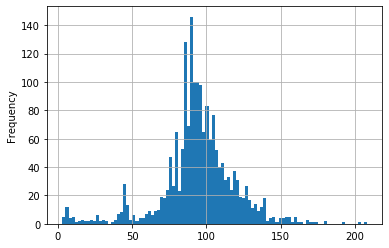

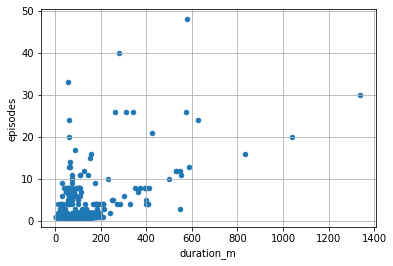

In [34]:
# Посмотрим значения для лент с 1 эпизодом
films_total.query('(episodes==1) and (box_office_mk>0)')['duration_m'].plot(kind='hist', bins=100, grid=True)
#Посмотрим распределение длительности для сериалов со средней длиной, до 200 эпизодов
films_total.query('box_office_mk>0 and episodes<60').plot(kind='scatter', x='duration_m', y='episodes', grid=True)


Видим, что распределение длительности идет без критичных выбросов, идет пик распределения на 90 и 45 минут, что согласуется с длиной полнометражных фильмов и фильмов тв-формата.

Создадим отдельный датафрейм со срезом по наличию box_office.

In [35]:
films_total_box = films_total.query('box_office_mk>0')
films_total_box.describe()

,pu_number,id_reestr,episodes,duration_m,age_restriction,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state
count,"5,683.0","5,683.0","2,169.0","5,318.0","5,680.0",381.0,514.0,506.0,"5,683.0",394.0
mean,"140,726,299.0","2,673,364.3",1.8,103.3,11.0,"16,056,569.9","56,397,698.7","139,271,685.3","47,818,009.6","596,070.6"
std,"52,204,070.5","1,016,003.0",6.4,153.2,6.7,"29,206,632.1","74,887,457.6","197,469,754.8","193,446,051.4","1,398,571.3"
min,"1,101,395.0","2,157,036.0",1.0,3.0,0.0,0.0,0.0,0.0,20.0,30.0
25%,"111,051,455.0","2,170,721.5",1.0,87.0,6.0,0.0,"25,000,000.0","46,153,856.2","2,080.0","6,565.0"
50%,"121,020,317.0","2,195,478.0",1.0,96.0,12.0,0.0,"30,000,000.0","70,043,219.5","51,550.0","65,852.5"
75%,"211,028,361.5","2,244,122.5",1.0,110.0,16.0,"20,000,000.0","50,000,000.0","150,135,822.0","4,925,187.0","438,990.8"
max,"236,001,106.0","6,814,194.0",254.0,"10,668.0",18.0,"200,000,000.0","613,000,000.0","2,305,074,303.0","3,073,806,945.9","11,903,736.0"


Посмотрим есть ли зависимость между длительностью ленты и сборами фильма.

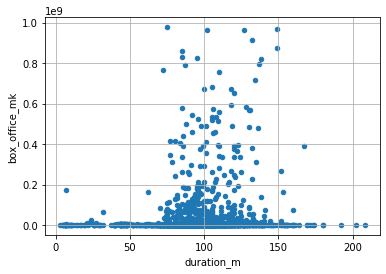

In [36]:
films_total_box.query('episodes==1 and box_office_mk<1000000000').plot(kind='scatter', x='duration_m', y='box_office_mk', grid=True)

Ленты короче 70 минут и длиннее 150 минут не показывают больших сборов. Посмотрим, как менялись количество и средняя длительность вышедших в прокат успешных лент, собравших хотя бы 50 миллионов рублей

,count,mean
date_show_film,,
"2,006.0",1,82.0
"2,008.0",1,100.0
"2,014.0",10,106.0
"2,015.0",48,103.9
"2,016.0",34,108.6
"2,017.0",29,104.3
"2,018.0",31,97.2
"2,019.0",49,103.0
"2,020.0",8,105.8


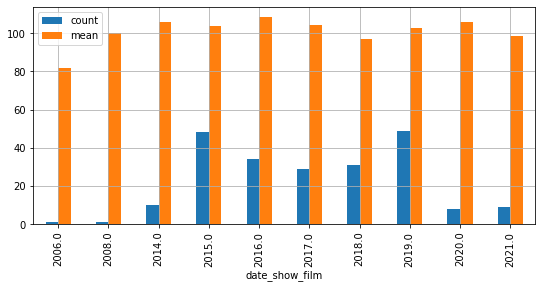

In [37]:
films_total_box.query('episodes==1 and box_office_mk>50000000'              #Нас интересуют только ленты с 1 эпизодом                         
                     ).groupby(films_total_box['date_show_film'].dt.year# группируем по году выхода фильма в прокат
                     ).aggregate(['count','mean']                     # используем две функции, среднее и количество 
                     )['duration_m'              # для столбца длительность
                     ].plot(kind='bar', 
                            grid=True, 
                            figsize=(9,4),
                           )
films_total_box.query('episodes==1 and box_office_mk>50000000'              #Нас интересуют только ленты с 1 эпизодом                         
                     ).groupby(films_total_box['date_show_film'].dt.year# группируем по году выхода фильма в прокат
                     ).aggregate(['count','mean']                     # используем две функции, среднее и количество 
                     )['duration_m'              # для столбца длительность
                     ]

###### Вывод
Видим, что средняя длительность успешных лент в прокате плавно увеличивалась к 2016 году до 110 минут, и потом лежала в диапазоне 95-105 минут до 2019 года. Данные по 2020 и 2021 году менее содержательны (менее 10 успешных картин) поэтому они могут искажать среднее в силу меньшего количества значений.

##### Анализ количественных показателей бюджета и господдержки
В данном разделе проверим, нет ли ошибок в данных о господдержке, 

In [38]:
films_total[{'budget_mk','refundable_support_mk','nonrefundable_support_mk'}].describe()

,nonrefundable_support_mk,refundable_support_mk,budget_mk
count,518.0,384.0,510.0
mean,"56,122,426.9","15,931,127.9","138,507,003.4"
std,"74,668,213.8","29,126,437.0","196,881,212.2"
min,0.0,0.0,0.0
25%,"25,000,000.0",0.0,"45,653,991.2"
50%,"30,000,000.0",0.0,"69,655,888.5"
75%,"50,000,000.0","20,000,000.0","150,077,729.8"
max,"613,000,000.0","200,000,000.0","2,305,074,303.0"


Основные статистические показатели выглядят нормально. В возвратной гос.поддержке идет перекос в сторону верхний децилей, обусловленный большим количеством нулевых значений.

Рассмотрим, нет ли ошибок в данных. По умолчанию, объем господдержки не может превышать общего бюджета. Проверим, действует ли это для данного датафрейма.

In [39]:
_ = films_total['budget_mk']<(films_total['refundable_support_mk']+films_total['nonrefundable_support_mk'])
_.sum() 

17

Таких значений 17. Выведем их на экран.

In [40]:
films_total[_][{'name','budget_mk','refundable_support_mk','nonrefundable_support_mk'}]

,nonrefundable_support_mk,refundable_support_mk,name,budget_mk
15202,"250,000,000.0",0.0,Притяжение (2016),0.0
9245,"75,000,000.0",0.0,Дуxless 2,0.0
85647,"40,000,000.0","20,000,000.0",Селфи,0.0
11097,"70,000,000.0","10,000,000.0",Воин (2015),0.0
11635,"100,000,000.0","60,000,000.0",Савва. Сердце воина,0.0
88054,"120,000,000.0","60,000,000.0",Большое путешествие,0.0
86025,"60,000,000.0","10,000,000.0",Два хвоста,0.0
86549,"40,000,000.0","40,000,000.0",Принцесса и дракон,0.0
12457,"35,000,000.0",0.0,Срочно выйду замуж,0.0
13396,"51,000,000.0","19,000,000.0",Любовь с ограничениями,0.0


Для данных фильмов отсутствуют данные о бюджете съемок. Оставим записи об этих лентах в датафрейме, т.к. они содержат информацию об объеме государственной поддержки.

Рассмотрим распределения значений в этих признаках в диапазоне 1- 50 млн.руб. (исключим 0, т.к. большое количество значений отсутствует)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8008a13d0>,
      dtype=object)

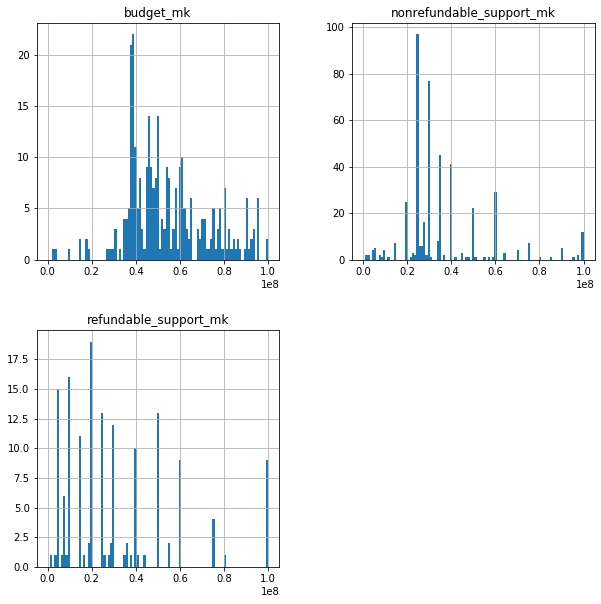

In [41]:
films_total[{'name','budget_mk','refundable_support_mk','nonrefundable_support_mk'}].hist(bins=99, figsize=(10,10), range=(1,100000000))

Видим, что если бюджет фильма распределяется относительно монотонно, то объемы господдержки имеют явно дискретную структуру, со стремлением к округлению до пяти и десяти миллионов. Для проверки корректности значений господдержки более 100 миллионов выведем эти данные отдельно

In [42]:
_ = (films_total['refundable_support_mk']>100000000)|(films_total['nonrefundable_support_mk']>100000000)
display('Топ-5 фильмов по невозвратной поддержке',films_total[_][{'name','budget_mk','refundable_support_mk','nonrefundable_support_mk'}
              ].sort_values('nonrefundable_support_mk', ascending=False).head(5))
display('Топ-5 фильмов по возвратной поддержке',films_total[_][{'name','budget_mk','refundable_support_mk','nonrefundable_support_mk'}
              ].sort_values('refundable_support_mk', ascending=False).head(5))

'Топ-5 фильмов по невозвратной поддержке'

,nonrefundable_support_mk,refundable_support_mk,name,budget_mk
45504,"613,000,000.0","115,000,000.0",Викинг,"1,224,661,889.0"
85584,"400,000,000.0",0.0,Движение вверх,"590,192,191.0"
89786,"400,000,000.0","100,000,000.0",Союз спасения,"980,000,000.0"
90907,"400,000,000.0","200,000,000.0",Вратарь Галактики,"957,522,955.0"
74396,"400,000,000.0",nan,Конек-Горбунок,"821,157,640.0"


'Топ-5 фильмов по возвратной поддержке'

,nonrefundable_support_mk,refundable_support_mk,name,budget_mk
90907,"400,000,000.0","200,000,000.0",Вратарь Галактики,"957,522,955.0"
88859,"90,000,000.0","180,000,000.0",Тайна Печати Дракона,"2,305,074,303.0"
14482,"300,000,000.0","150,000,000.0",Дуэлянт,"684,200,536.0"
91782,nan,"120,000,000.0",Конь Юлий и большие скачки,"178,952,138.0"
87395,0.0,"115,000,000.0",Три богатыря и наследница престола,"185,500,705.0"


###### Вывод
Приведенные выше ленты действительно высокобюджетные. Охарактеризовать значения господдержки как выбросы нельзя.

##### Выделение главных компонент столбцов

Добавим столбцы с главным жанром, режиссером, страной и студией для упрощения дальнейшего анализа.

In [43]:
films_total_box['genres_main'] = films_total_box['genres'].loc[~films_total_box['genres'].isna()].copy().apply(lambda x:(x[0]))
films_total_box['director_main'] = films_total_box['director'].loc[~films_total_box['director'].isna()].copy().apply(lambda x:(x[0]))
films_total_box['country_main'] = films_total_box['country'].loc[~films_total_box['country'].isna()].copy().apply(lambda x:(x[0]))
films_total_box['studio_main'] = films_total_box['studio'].loc[~films_total_box['studio'].isna()].copy().apply(lambda x:(x[0]))

films_total_box.head(1) #Проверим

,name,name_foreign,pu_number,date_pu_reg,date_show_film,id_reestr,type_film,category_film,episodes,duration_m,studio,country,year_production,director,screenwriter,producer,category_use,age_restriction,financing_source,genres,source,film_studio,show_start_date,refundable_support_mk,nonrefundable_support_mk,budget_mk,box_office_mk,viewer_state,genres_main,director_main,country_main,studio_main
89758,Холоп,NaN,"111,021,719.0",2019-12-11 12:00:00,2019-12-19 12:00:00,"5,467,435.0",художественный,Кино,1.0,109.0,"[ооо ""мем-медиа"" по заказу ао ""вбд груп""]",[россия],2019,[к.шипенко],"[д.грацевич, а.морозенко, д.пермяков]","[э.илоян, д.жалинский, в.дусмухаметов, т.ба...","[показ фильма в кинозале, прокат фильма на ма...",12.0,[фонд кино],[комедия],Фонд кино,"[ооо ""мем""]",2019-12-26,"25,000,000.0","35,000,000.0","160,000,000.0","3,073,806,945.9","11,639,702.0",комедия,к.шипенко,россия,"ооо ""мем-медиа"" по заказу ао ""вбд груп"""


Добавим столбец 'part_gos_finans', содержащий долю государственной поддержки от общего бюджета фильма

In [44]:
films_total_box['refundable_support_mk'].fillna(value=0, inplace=True)
films_total_box['nonrefundable_support_mk'].fillna(value=0, inplace=True)
films_total_box['part_gos_finans'] = films_total_box['refundable_support_mk']/films_total_box['budget_mk'
                                      ]+films_total_box['nonrefundable_support_mk']/films_total_box['budget_mk']
#т.к. была операция деления, заменим +-бесконечные значения на None
films_total_box['part_gos_finans'].replace([np.inf, -np.inf], np.nan, inplace=True)

##### Анализ финансовых показателей
Рассмотрим распределения сборов фильма и количества зрителей. Если будут сильные выбросы от линейной зависимости, значит в данных какие-то проблемы.

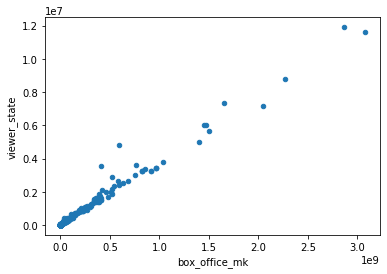

In [45]:
films_total_box.plot(kind='scatter', x='box_office_mk', y='viewer_state')

Как мы видим, зависимость практически идеально линейная

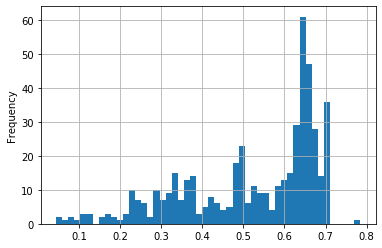

In [46]:
films_total_box['part_gos_finans'].plot(kind='hist', bins=50, grid=True)
#films_total_box.info()

Доля госфинансирования тоже без выбросов, значения лежат в диапазоне [0,1].

__Вывод__

Кассовые сборы и доля гос.финансирования в бюджете фильма не имеют явных выбросов и укладываются в логичную систему.

#### Вывод
Данные готовы для проведения анализа. Дубликаты удалены, выбросов по основным финансовым показателям не наблюдается.

### Исследовательский анализ данных
В данном разделе будут рассмотрены основные зависимости, так или иначе характеризующие успешность лент в прокате:
- Динамика выдачи прокатных удостоверений по годам
- Динамика суммы сборов лент по годам
- Медианные и средние значения для фильмов по годам
- Количество кассовых сборов в зависимости от жанра 
- Количество кассовых сборов в зависимости от возрастной категории


Посмотрим, скольким лентам выдаются прокатные удостоверения в разрезе по годам, и как распределены сборы.

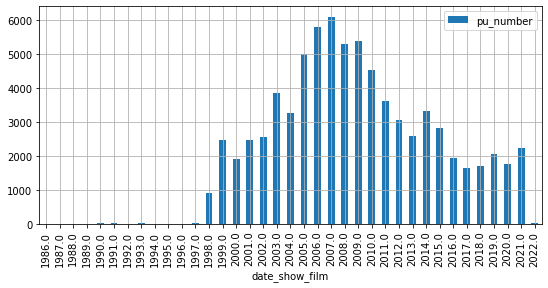

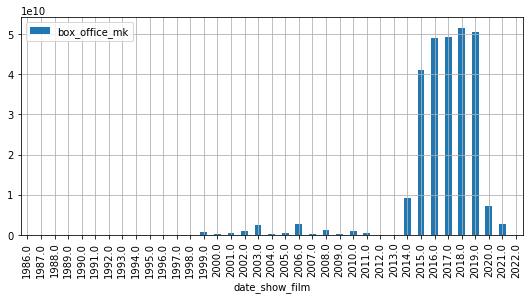

In [47]:
films_total.groupby(by=films_total['date_show_film'].dt.year).count().plot(kind='bar', y='pu_number', figsize=(9,4), grid=True)
films_total.groupby(by=films_total['date_show_film'].dt.year).sum().plot(kind='bar', y='box_office_mk', figsize=(9,4), grid=True)

Т.к. данные по сборам присутствуют не для всех лент, сравнение этих двух диаграмм не показательно.
Рассмотрим данные по количеству лент, для которых есть данные о прокате. Определим, для какой доли фильмов указана информация о прокате.

In [48]:
print('Процент лент, для которых указана информация о прокате: {:.1%}'
       .format((films_total['box_office_mk']>0).mean()))

Процент лент, для которых указана информация о прокате: 7.2%


Далее будем рассматривать только те фильмы, для которых есть данные о бюджете съемок.

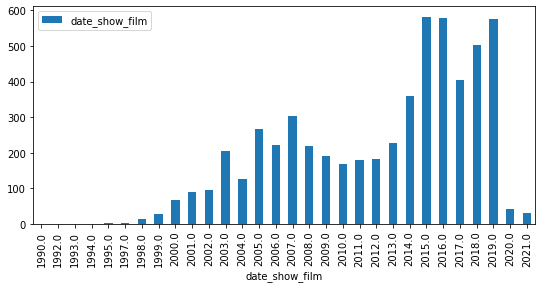

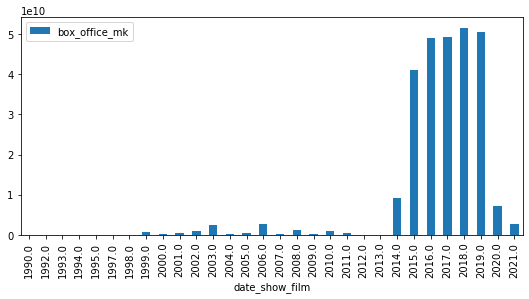

In [49]:
films_total_box.groupby(by=films_total_box['date_show_film'].dt.year).count().plot(kind='bar', y='date_show_film', figsize=(9,4))
films_total_box.groupby(by=films_total_box['date_show_film'].dt.year).sum().plot(kind='bar', y='box_office_mk', figsize=(9,4))

Рассмотрим медианные данные проката - сколько собирали ленты в каждом году

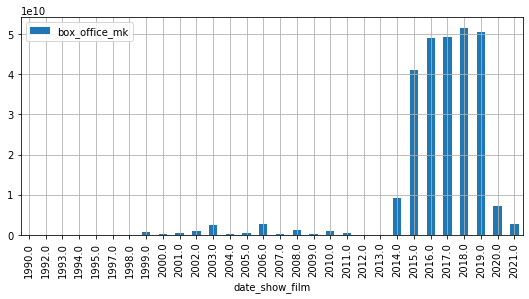

In [50]:
films_total_box.groupby(by=films_total_box['date_show_film'].dt.year).sum().plot(kind='bar', grid=True, y='box_office_mk', figsize=(9,4))

Падение суммарынх сборов в 2020 и 2021 году выглядит странным. Конечно вводились короновирусные ограничения, но по данным фонда кино ( см. https://www.fond-kino.ru/news/itogi-kinoprokata-v-2020-godu/, https://www.fond-kino.ru/news/itogi-kinoprokata-v-2019-godu/) в 2020 году падение сборов на российском рынке было на 58,8 процентов к 2019 году, от 55,5 до 22,8 млрд.руб. И если для наших данных сборы практически совпадают для перода 2015-2019 года, то для 2020 как и для 2014(46,2 млрд по данным https://www.kinobusiness.com/total/2014/), а так же ранее, данные явно не полные. Что странно, так как данные по сборам кинопроката брались с официального сайта МинКульта.
Предположу, что Минкульт допустил ошибку в выгрузке данных с ЕАИС, и в дальнейшем рассмотрении будем использовать только данные кинопроката с 2015 по 2019 года(films_2015_2019).

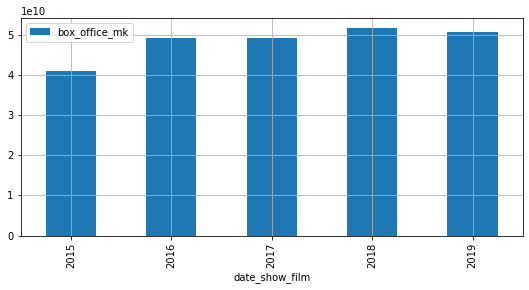

In [51]:
films_2015_2019 = films_total_box.loc[films_total_box['date_show_film'].dt.year.isin(range(2015,2020))]
films_2015_2019.groupby(by=films_2015_2019['date_show_film'].dt.year).sum().plot(kind='bar', grid=True, y='box_office_mk', figsize=(9,4))

__Вывод__

Видим, что 2017 год на первом месте по суммарным сборам. В 2015 году же суммарные сборы минимальны, возможно это связано с влиянием экономического кризиса 2014 года и падением доходов населения.

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов лент для каждого года.

In [52]:
display(films_2015_2019.pivot_table(index=films_2015_2019['date_show_film'].dt.year,
                           values='box_office_mk',
                           aggfunc=['mean', 'median']))

,mean,median
,box_office_mk,box_office_mk
date_show_film,,
2015,"70,462,932.2","2,238,500.2"
2016,"84,631,128.6","3,128,276.2"
2017,"121,796,054.1","7,663,682.0"
2018,"102,666,460.4","8,259,906.9"
2019,"87,722,020.7","4,125,487.0"



По разнице среднего и медианного значений, можем сказать что в данных существуют выбросы по части фильмов, собравших сверхбольшую кассу. 

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

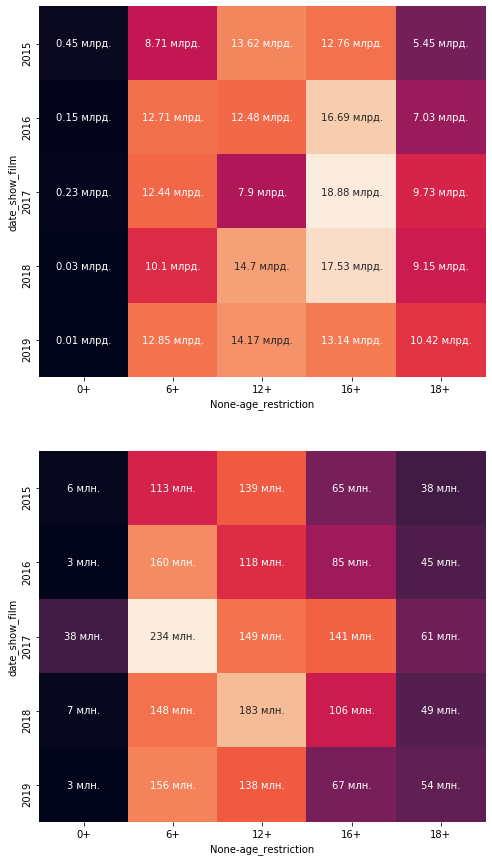

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 15)) 
#Для облегчения сравнения расположим хитмапы рядом
annot_1 = films_2015_2019.pivot_table(index=films_2015_2019['date_show_film'].dt.year,
                                      columns='age_restriction', 
                                      values='box_office_mk', 
                                      aggfunc=['sum'])
annot_2 = films_2015_2019.pivot_table(index=films_2015_2019['date_show_film'].dt.year,
                                      columns='age_restriction',
                                      values='box_office_mk',
                                      aggfunc=['mean'])
#annot_1.applymap(lambda x: str(int(x//1000000))+' млн.')

sns.heatmap(data=annot_1, 
            annot=annot_1.applymap(lambda x: str((x//10000000)/100)+' млрд.'), 
            ax=ax1, 
            fmt='s',
            robust=True,
            cbar=False,
            xticklabels=['0+','6+','12+','16+','18+'])
sns.heatmap(data=annot_2, 
            annot=annot_2.applymap(lambda x: str(int(x//1000000))+' млн.'),
            ax=ax2,
            fmt='s',
            robust=True,
            cbar=False,
            xticklabels=['0+','6+','12+','16+','18+'])
# Чтобы изменить вывод подписе, необходимо создать массив соразмерный легенде,
# и изменить его на нужное значение.
#
#


На приведенной тепловой карте видим, что больше всего денег в прокате суммарно собирают фильмы 16+, тогда как фильмы категории 0+ меньше всех. Но при оценке средних сборов картина меняется, и вперед выходят фильмы 6+, а 0+ и 18+ почти равняются между собой. Скорее всего это связано с большим количеством блокбастеров, выходящих в этой возрастной категории.

Аналогично проверим сборы фильмов по жанрам.

['фантастика', 'мультфильм', 'боевик', 'комедия', 'фэнтези']

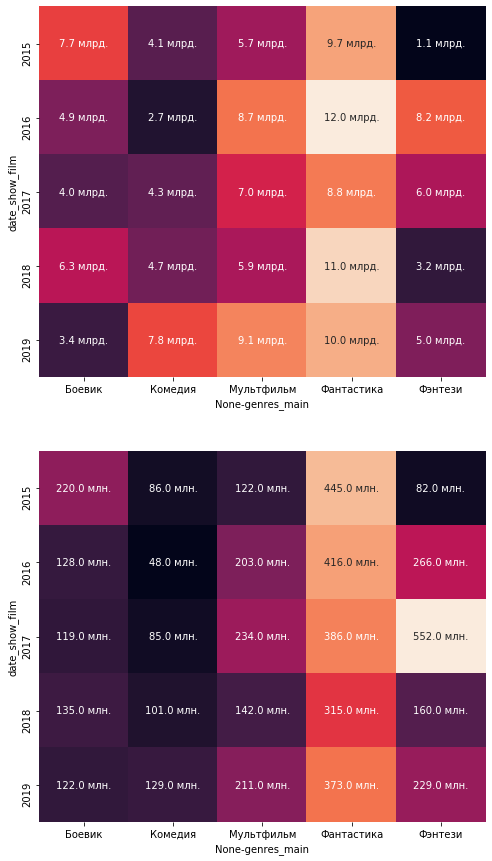

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 15)) 
#Для облегчения сравнения расположим хитмапы рядом
# Выделим топ-10 жанров по сборам
top_genres = films_2015_2019.groupby('genres_main'
                             ).sum(
                             ).sort_values('box_office_mk', ascending=False
                             ).head(5
                             ).index.to_list()
annot_1 = films_2015_2019.query('genres_main.isin(@top_genres)'
                 ).pivot_table(index=films_2015_2019['date_show_film'].dt.year,
                               columns='genres_main', 
                               values='box_office_mk', 
                               aggfunc=['sum'])
annot_2 = films_2015_2019.query('genres_main.isin(@top_genres)'
                 ).pivot_table(index=films_2015_2019['date_show_film'].dt.year,
            columns='genres_main', 
            values='box_office_mk', 
            aggfunc=['mean'])


sns.heatmap(data=annot_1, 
            annot=annot_1.applymap(lambda x: str((x//100000000)/10)+' млрд.'), 
            ax=ax1, 
            fmt='s',
            robust=True,
            cbar=False,
            xticklabels=['Боевик','Комедия','Мультфильм','Фантастика','Фэнтези'])
sns.heatmap(data=annot_2, 
            annot=annot_2.applymap(lambda x: str((x//1000000))+' млн.'),
            ax=ax2,
            fmt='s',
            robust=True,
            cbar=False,
            xticklabels=['Боевик','Комедия','Мультфильм','Фантастика','Фэнтези'])
top_genres

Среди топ-10 жанров наблюдаются следующие тенденции: 
- Высокие сборы в жанре фантастика, средние сборы падают от года к году
- Высокие сборы в жанре мультфильмы, средние сборы растут
- Высокие сборы в жанре боевик, средние сборы падают

#### Вывод

Динамика выхода лент в прокат показывает, что количество выданных прокатных удостоверений растет вплоть до 2007 года, достигая 6000 штук, затем идет плавное снижение до 1700 шт. в 2017 году с небольшой коррекцией до 2021 года (2000...2100). При этом данные о сборах с проката в кинотеатрах присутствуют только для 7,2% лент.

Динамика проката по годам показывает возрастание общего количества сборов от 2015 к 2017 году до 53 миллиардов рублей, с последующим снижением до 48 миллиардов в 2019 году. В 2015 году общие сборы были минимальны, на уровне 41 миллиарда рублей.

Больше всего денег в прокате суммарно собирают фильмы 16+, тогда как фильмы категории 0+ меньше всех. Но при оценке средних сборов картина меняется, и вперед выходят фильмы 6+, а 0+ и 18+ почти равны между собой. Скорее всего это связано с большим количеством блокбастеров, выходящих в этой возрастной категории. Средние сборы фильмов по возрастным категориям более показательны в этом плане, т.к. в плане суммарных сборов одиночные блокбастеры, собирающие 1-2 миллиарда рублей, сильно влияют на итоговую картину. А они показывают четкую тенденцию к плавному снижению всех сборов по всем категориям.


### Исследование фильмов, которые получили государственную поддержку

Для исследования сферы господдержки кинематографа в РФ, рассмотрим следующие задачи:

- Сравним кассовые сборы фильмов с господдержкой, просто фильмов производства РФ и целиком всего рынка проката в РФ;
- Рассмотрим фильмы, которые не окупили свой бюджет;
- Определим режиссеров и студий, которые сняли наиболее убыточные фильмы;
- Проверим, сколько убыточных картин снято одними и теми же издателями.


In [55]:
print('Господдержка российского кино, млрд.руб:      {0:.2f}'.format((films_2015_2019.refundable_support_mk.sum()+films_2015_2019.nonrefundable_support_mk.sum())/1000000000))
print('   Из них, безвозвратной поддержки, млрд.руб: {0:.2f}'.format(films_2015_2019.nonrefundable_support_mk.sum()/1000000000))
print('              Возвратной поддержки, млрд.руб: {0:.2f} \n'.format(films_2015_2019.refundable_support_mk.sum()/1000000000))
print('Суммарные бюджет всех российский фильмов, млрд.руб:                 {0:.2f}'.format(films_2015_2019.query('country_main=="россия"')['budget_mk'].sum()/1000000000))
print('Суммарные сборы всех российский фильмов, млрд.руб:                  {0:.2f}'.format(films_2015_2019.query('country_main=="россия"')['box_office_mk'].sum()/1000000000))
print('   Из них, сборы всех российский фильмов с господдержкой, млрд.руб: {0:.2f}'.format(
    films_2015_2019.query('(refundable_support_mk+nonrefundable_support_mk)!=0')
                          ['box_office_mk'].sum()/1000000000))
print('           сборы всех российский фильмов без господдержки, млрд.руб: {0:.2f}'.format(
    films_2015_2019.query('(refundable_support_mk+nonrefundable_support_mk)==0 and country_main=="россия"')
                          ['box_office_mk'].sum()/1000000000))
print('           средняя доля господдержки в фильмах, млрд.руб: {0:.2f}'.format(
    films_2015_2019.query('(refundable_support_mk+nonrefundable_support_mk)!=0')
                          ['part_gos_finans'].mean()))


Господдержка российского кино, млрд.руб:      21.35
   Из них, безвозвратной поддержки, млрд.руб: 17.20
              Возвратной поддержки, млрд.руб: 4.15 

Суммарные бюджет всех российский фильмов, млрд.руб:                 38.41
Суммарные сборы всех российский фильмов, млрд.руб:                  53.89
   Из них, сборы всех российский фильмов с господдержкой, млрд.руб: 46.60
           сборы всех российский фильмов без господдержки, млрд.руб: 9.84
           средняя доля господдержки в фильмах, млрд.руб: 0.52


Как мы видим по тем фильмам, данные о которых предоставили их создатели, только на 44% бюджет россиского кинематографа обеспечен частными средствами, и в среднем господдержка занимает 52% бюджета фильма.

Рассмотрим фильмы, которые не окупили свой бюджет. Пусть нам неизвестен полный бюджет большинства фильмов, но мы можем принять допущение, что если совокупные сборы меньше суммы возвратной господдержки, то фильм точно не окупил выделенные из бюджета деньги, и их государству не вернут. Подсчитаем эту разницу.

In [56]:
films_2015_2019['minusa']=films_2015_2019['box_office_mk']-films_2015_2019['refundable_support_mk']#-films_2015_2019['nonrefundable_support_mk']
display(films_2015_2019.query('minusa<0').groupby(
    films_2015_2019.query('not studio.isna()')['studio'].apply(lambda x:(x[0]))).sum().sort_values(
    'minusa')['minusa'].head(10))
films_2015_2019.query('minusa<0')['minusa'].sum()


studio
ооо "продюсерский центр "ленфильм"          -46,598,840.7
 ооо "студия 25"                            -28,569,373.2
ооо "визарт фильм"                          -28,482,223.3
ооо "крылья"                                -25,165,820.2
ооо "кинобюро" по заказу ооо "среда и ко"   -24,991,000.0
 ооо "таббак"                               -24,152,082.4
ооо "продакшн сервис"                       -20,799,175.5
ооо "тпо "рок"                              -20,044,197.0
ооо "продюсерский центр "золотой век"       -18,328,332.2
ооо "киностудия "арк-фильм"                 -18,187,507.2
Name: minusa, dtype: float64

-397326347.775

Суммарно, студии никак не смогут вернуть возвратных субсидий на сумму минимум 397 миллионов рублей.

А насколько были бы убыточны эти фильмы, если бы не было невозвратных субсидий? Для этого добавим в расчет их сумму.

In [57]:
#Фантазии особо нет на название столбцов
films_2015_2019['minusa']=-films_2015_2019['box_office_mk']+films_2015_2019['refundable_support_mk']+films_2015_2019['nonrefundable_support_mk']
display(films_2015_2019.query('minusa>0').groupby(
    films_2015_2019.query('not film_studio.isna()')['film_studio'].apply(lambda x:(x[0]))).sum().sort_values(
    'minusa', ascending=False)['minusa'].head(10))
films_2015_2019.query('minusa>0')['minusa'].sum()

film_studio
ооо "нон-стоп продакшн"                                   329,609,956.5
ооо "кинокомпания "ств"                                   177,401,090.5
ооо "арт пикчерс студия"                                  137,634,765.8
ооо "централ партнершип"                                  137,212,040.4
ооо "киностудия "вертикаль"                               123,972,043.2
ооо "58                                                   121,771,876.8
ооо "мастерская павла лунгина" ооо "арт пикчерс студия"   119,397,114.1
ооо "киностудия "арк-фильм"                               118,187,507.2
ао "тпо "киностудия им. м. горького"                      114,406,937.5
ооо "продюсерский центр "ленфильм"                        112,701,225.5
Name: minusa, dtype: float64

7107546619.385

Минимум 7,1 миллиардов государственных субсидий перекрывают убыток российской киноиндустрии, это сравнимо с 15% годовой выручки всего российского кинематографа. Проверим, какие режиссеры наиболее убыточны с этой точки зрения, в разрезе общих убытков и в разрезе убыточных картин.

In [58]:
display(films_2015_2019.query('minusa>0').groupby(
            films_2015_2019.query('not director.isna()')['director'
                ].apply(lambda x:(x[0]))
                ).aggregate(['sum','count']
                ).sort_values([('minusa','sum')], ascending=False
                )[('minusa')
                ].head(10))


,sum,count
director,,
н.хомерики,"244,066,724.8",1
п.лунгин,"203,039,444.9",2
р.давлетьяров,"171,860,866.7",3
и.джендубаев,"139,828,551.5",1
в.саков,"137,634,765.8",1
ф.дмитриев,"131,442,492.3",1
а.цицилин,"128,482,223.3",1
а.котт,"125,526,364.9",3
а.китайцев,"119,779,455.0",2


Таким образом, мы получили список режиссеров, которые несмотря на убыточность их картин, пользуются господдержкой. Аналогично можем сделать выборку по студиям, снимающим кино с господдержкой.

In [59]:
display('Лидеры отрасли по сумме убытков', films_2015_2019.query('minusa>0').groupby(
            films_2015_2019.query('not studio.isna()')['studio'
                ].apply(lambda x:(x[0]))
                ).aggregate(['sum','count']
                ).sort_values([('minusa','sum')], ascending=False
                )[('minusa')
                ].head(10
                ).join(films_2015_2019.groupby('studio_main').count()['name']
                ).join(films_2015_2019.groupby('studio_main').sum()['box_office_mk']
                ).rename(columns={'sum':'Сумма убытков',
                                  'count':'Фильмов с убытком',
                                  'name':'Всего фильмов',
                                  'box_office_mk':'Сумма сборов всех фильмов'}))
display('Лидеры отрасли по количеству убыточных фильмов', films_2015_2019.query('minusa>0').groupby(
            films_2015_2019.query('not studio.isna()')['studio'
                ].apply(lambda x:(x[0]))
                ).aggregate(['sum','count']
                ).sort_values([('minusa','count')], ascending=False
                )[('minusa')
                ].head(10
                ).join(films_2015_2019.groupby('studio_main').count()['name']
                ).join(films_2015_2019.groupby('studio_main').sum()['box_office_mk']
                ).join(films_2015_2019.groupby('studio_main').sum()['nonrefundable_support_mk']
                ).rename(columns={'sum':'Сумма убытков',
                                  'count':'Фильмов с убытком',
                                  'name':'Всего фильмов',
                                  'box_office_mk':'Сумма сборов всех фильмов',
                                  'nonrefundable_support_mk':'Невозвратная гос.поддержка'}))

'Лидеры отрасли по сумме убытков'

,Сумма убытков,Фильмов с убытком,Всего фильмов,Сумма сборов всех фильмов
studio,,,,
"ооо ""нон-стоп продакшн""","329,609,956.5",2,3,"515,775,332.5"
"ооо ""продюсерский центр ""ленфильм""","208,427,311.5",5,7,"33,402,735.5"
"ооо ""таббак""","157,152,883.5",2,11,"3,433,446,546.3"
"ооо ""компания ""реал-дакота""","152,794,298.7",2,5,"519,976,435.0"
"ооо ""визарт фильм""","140,286,987.1",2,3,"325,031,339.0"
"ооо ""арт пикчерс студия""","137,634,765.8",1,3,"1,025,465,283.0"
"ооо ""студия анимационного кино ""мельница""","131,442,492.3",1,27,"3,372,742,893.5"
"ооо ""каро продакшн""","126,926,519.7",4,4,"25,573,480.3"
"ооо ""киностудия ""вертикаль""","123,972,043.2",4,4,"19,027,956.8"


'Лидеры отрасли по количеству убыточных фильмов'

,Сумма убытков,Фильмов с убытком,Всего фильмов,Сумма сборов всех фильмов,Невозвратная гос.поддержка
studio,,,,,
"ооо ""кинокомпания ""ств""","100,821,458.5",5,8,"227,771,402.4","220,000,000.0"
"ооо ""продюсерский центр ""ленфильм""","208,427,311.5",5,7,"33,402,735.5","180,000,866.0"
"ооо ""каро продакшн""","126,926,519.7",4,4,"25,573,480.3","127,500,000.0"
"ооо ""артлайт""","84,699,739.5",4,7,"21,242,369.0","103,000,000.0"
"ооо ""киностудия ""вертикаль""","123,972,043.2",4,4,"19,027,956.8","143,000,000.0"
"ооо ""студия ""слон""","45,410,513.1",3,3,"44,589,486.9","90,000,000.0"
"ооо ""ввп альянс""","37,769,581.8",2,3,"103,997,128.1","86,500,000.0"
"ооо ""кинокомпания марс-фильм"" по заказу ооо ""марс медиа энтертейнмент""","72,407,902.5",2,2,"2,592,097.5","75,000,000.0"
"ооо ""кинокомпания ""спутник""","38,803,737.5",2,2,"16,196,262.5","55,000,000.0"


Весьма показателен список Топ-10 студий по сумме убытков. Например студия анимации "Мельница", несмотря на то, что она входит в десятку по убыточности, это был всего один фильм, тогда как суммарные сборы всех 27 фильмов этой студии 3,3 миллиарда рублей. Или ООО "Таббак", имеет два убыточных фильма, а общие сборы от 11 фильмов 3,4 миллиарда.
Но вот студия ООО "Продюсерский центр "Ленфильм" пять из семи фильмов сняла на государственное финансирование с убытком 208 миллионов, при этом ее суммарные сборы всего 33 миллиона. ООО "Каро Продакшн" сумма убытков 126 млн, общие сборы 25,5 млн. Киностудия вертикаль 123 миллиона убытков общие сборы 19 миллионов. ООО "58,5 продакшн" 121 миллионов убытков, 23 миллиона сборов. Еще эти студии объединяет низкий уставной капитал (до 100 тысяч рублей), маленькое количество официально трудоустроенных работников (от 0 до 3) и стабильная околонулевая прибыль за рассматриваемый период (Данные портала "Чекко" о проверке контрагентов), и все эти факторы не мешают им регулярно получать от государства невозвратные субсидии в сотни миллионов рублей.
Однако стоит учитывать неполноту исходных данных (2015-2019 год) и отсутствие полных данных о бюджете картин. 

#### Вывод
Сфера кинематографа в России сильно зависит от государственной поддержки. 52% бюджета среднего российского фильма обеспечивается тем, или иным государственным софинансированием. Существует ряд студий, стабильно выпускающих убыточные ленты с господдержкой, сборы которых не покрывают даже невозвратное финансирование.

## Заключение

Для увеличения охвата исследования, к предоставленным к проекту таблицам были добавлены данные с сайта открытых данных министерства культуры. 
В процессе исследования было выявлено, что в период с 2015 по 2021 годы на рынке кинопроката РФ существовали следующие тренды:
- Снижение средней длительности успешных фильмов (со сборами более 50 миллионов рублей) - от 106..108 минут в 2014-2016 годах, до 97..98 минут в 2019-2021 годах
- Количество выданных прокатных удостоверений росло до 2007 года (более 6000 лент в различных типах проката), затем начало уменьшаться до 2017 года (менее 2000 лент), и до 2021 года идет слабое восстановление. 
- суммарные сборы всех картин на российском кинорынке росли до 2017 года, затем началось плавное сокращение сборов. Возможно, это связано с общим падением покупательной способности населения. Тенденция по падению сборов после 2017 года сохраняется как в разрезе вохрастных категорий, так и в разрезе жанров, то есть это не связано с какими-то сверхуспешными картинами, вышедшими в 2017 году и исказившими картину.
- В среднем, наиболее успешны в прокает ленты возрастной категории 6+, затем идет категория 12+. Категории 18+ и 0+ собирают наименьший средний бокс-офис.
Среди топ-10 жанров, вышедших в прокат с 2015 по 2019 год наблюдаются следующие тенденции: 
- Высокие сборы в жанре фантастика, но средние сборы падают от года к году
- Высокие сборы в жанре мультфильмы, и средние сборы растут
- Высокие сборы в жанре боевик, но средние сборы падают
- Стабильно низкие сборы в жанрах драма и триллер.

В процессе исследования фильмов с господдержкой было выявлено следующее:
- Суммарно, 400 миллионов возвратных субсидий было выделено на фильмы, которые собрали в прокате меньше, чем должны были вернуть в бюджет.
- Если бы не было невозвратных субсидий, сборы бы не покрывали суммарный бюджет картин более чем на 7,1 млрд рублей.
- Сфера кинематографа в России сильно зависит от государственной поддержки.
- Без невозвратной государственной поддержки большинство этих фильмов были бы глубоко убыточны.
- Даже самые провальные ленты получившие невозвратную господдержку не влияют на дальнейшее получение субсидий киностудией.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Пасхалка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            
![Image of Yaktocat](https://www.stratege.ru/forums/files/gallery/1/b12/564/7e58a3f0985f1881289ce4925d7c73ec.jpg)

   